In [8]:
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.datasets import load_boston   #for loading the toy datasets to check our code

In [10]:
#load_boston() returns the regression dataset
dataset = load_boston()
#dataset.data gives the features
x = dataset.data
y = dataset.target[:,np.newaxis]

print("Total Number of Samples in our dataset is: {}".format(x.shape[0]))

Total Number of Samples in our dataset is: 506


In [11]:
def compute_cost(x, y, params):
    number_of_samples = len(y)
    h = x @ params
    return (1/(2*number_of_samples))*np.sum((h-y)**2)


In [12]:
def gradient_descent(X, y, params, learning_rate, n_iters):
    number_of_samples = len(y)
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
        params = params - (learning_rate/number_of_samples) * x.T @ (x @ params - y) 
        J_history[i] = compute_cost(x, y, params)

    return (J_history, params)


In [13]:
number_of_samples = len(y)

mu = np.mean(x, 0)
sigma = np.std(x, 0)

x = (x-mu) / sigma

x = np.hstack((np.ones((number_of_samples,1)),x))
n_features = np.size(X,1)
params = np.zeros((n_features,1))

In [14]:
n_iters = 1500
learning_rate = 0.01

initial_cost = compute_cost(x, y, params)

print("Initial cost --> ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X, y, params, learning_rate, n_iters)

print("|-- Optimal parameters --| \n", optimal_params, "\n")

print("Final cost --> ", J_history[-1])

Initial cost -->  296.0734584980237 

|-- Optimal parameters --| 
 [[22.53279993]
 [-0.83980839]
 [ 0.92612237]
 [-0.17541988]
 [ 0.72676226]
 [-1.82369448]
 [ 2.78447498]
 [-0.05650494]
 [-2.96695543]
 [ 1.80785186]
 [-1.1802415 ]
 [-1.99990382]
 [ 0.85595908]
 [-3.69524414]] 

Final cost -->  [11.00713381]


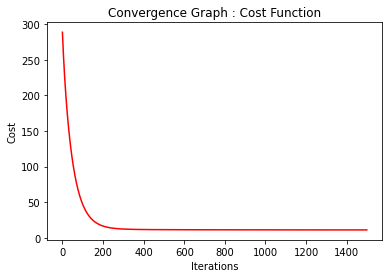

In [16]:
plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph : Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()